<a href="https://www.kaggle.com/code/seaavsh/sales-forecasting?scriptVersionId=220231782" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-superstore-20152018/Dataset- Superstore (2015-2018).csv


In [2]:
from dateutil.parser import parse
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams.update({'figure.figsize':(10,7),'figure.dpi':120})

In [3]:
df=pd.read_csv('../input/dataset-superstore-20152018/Dataset- Superstore (2015-2018).csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014/01/21,2014/01/23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017/02/26,2017/03/03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017/02/26,2017/03/03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017/02/26,2017/03/03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [5]:
OS= df.loc[df['Category']=='Office Supplies']
OS.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700


In [6]:
print('Starting date:',OS['Order Date'].min())
print('Ending date:',OS['Order Date'].max())

Starting date: 2014/01/03
Ending date: 2017/12/30


In [7]:
# Drop unrelevant variables:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']


OS.drop(cols, axis=1, inplace= True)
OS

<ipython-input-7-4a420783bd56>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OS.drop(cols, axis=1, inplace= True)


,Order Date,Sales
2,2016/06/12,14.620
4,2015/10/11,22.368
6,2014/06/09,7.280
8,2014/06/09,18.504
9,2014/06/09,114.900
...,...,...
9982,2016/09/22,35.560
9984,2015/05/17,31.500
9985,2015/05/17,55.600
9992,2017/02/26,29.600


In [8]:
### Check out missing values:
OS.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [9]:
OS= OS.groupby('Order Date')['Sales'].sum().reset_index()
OS.head()

,Order Date,Sales
0,2014/01/03,16.448
1,2014/01/04,288.060
2,2014/01/05,19.536
3,2014/01/06,685.340
4,2014/01/07,10.430


In [10]:
OS['Order Date'] = pd.to_datetime(df['Order Date'])
OS= OS.set_index('Order Date')
OS

,Sales
Order Date,
2016-11-08,16.448
2016-11-08,288.060
2016-06-12,19.536
2015-10-11,685.340
2015-10-11,10.430
...,...
2014-09-29,814.594
2014-09-29,13.248
2014-09-29,1091.244


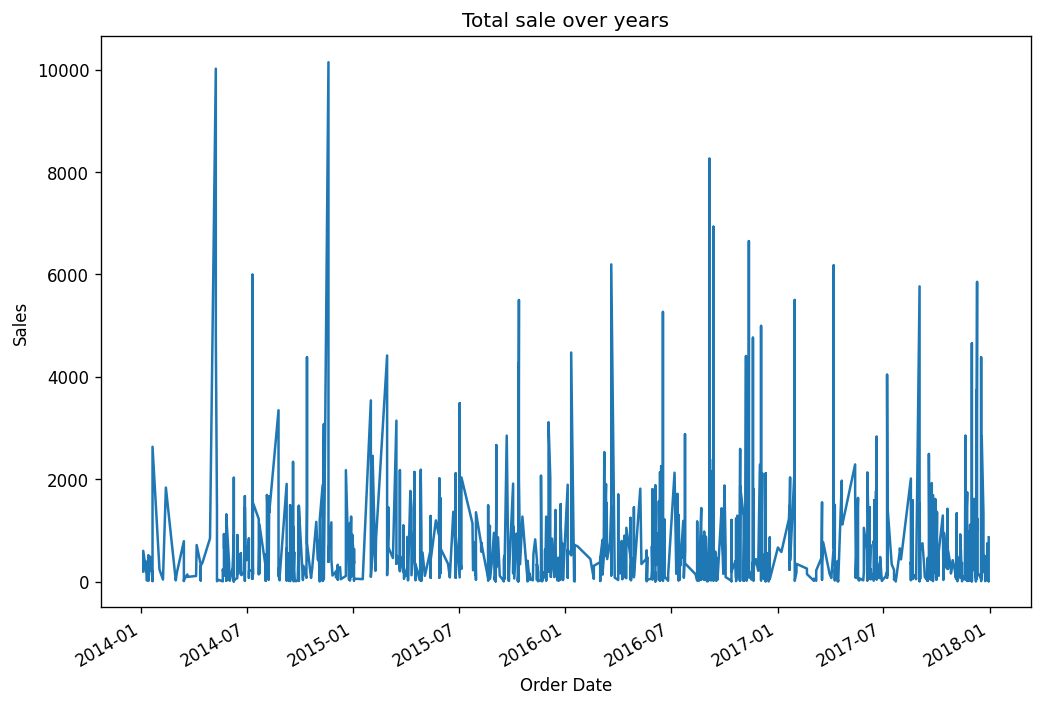

In [11]:
OS['Sales'].plot()
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Total sale over years')
plt.show()

In [12]:
#create new DataFrame
monthly_OS = pd.DataFrame()

monthly_OS['Sales'] = OS['Sales'].resample('MS').mean()

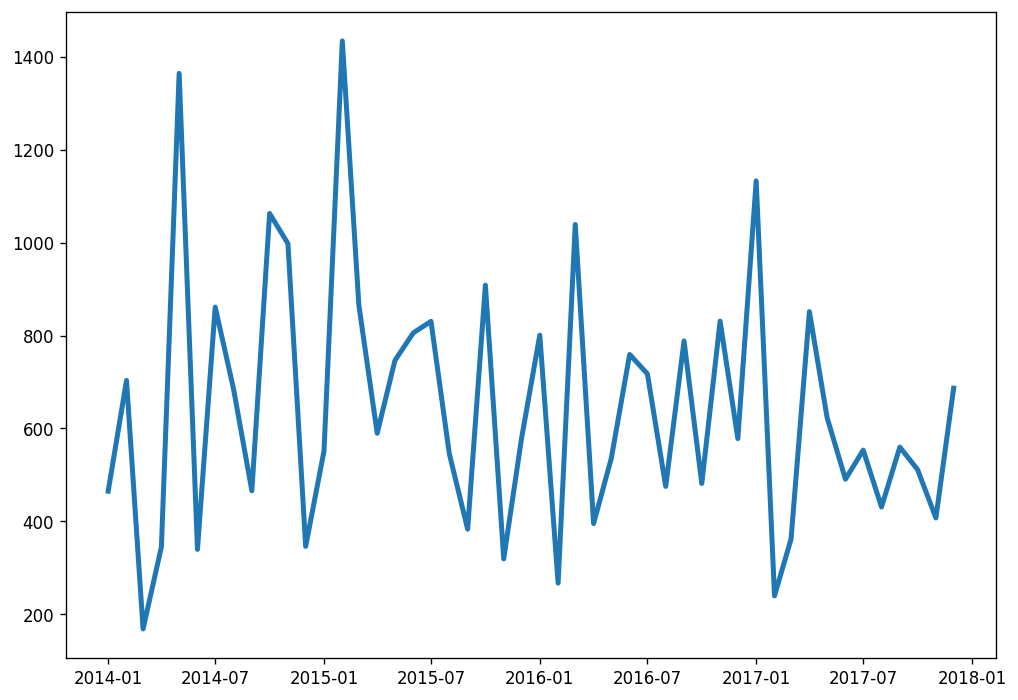

In [13]:
#plot weekly sales data
plt.plot(monthly_OS.index, monthly_OS.Sales, linewidth=3)

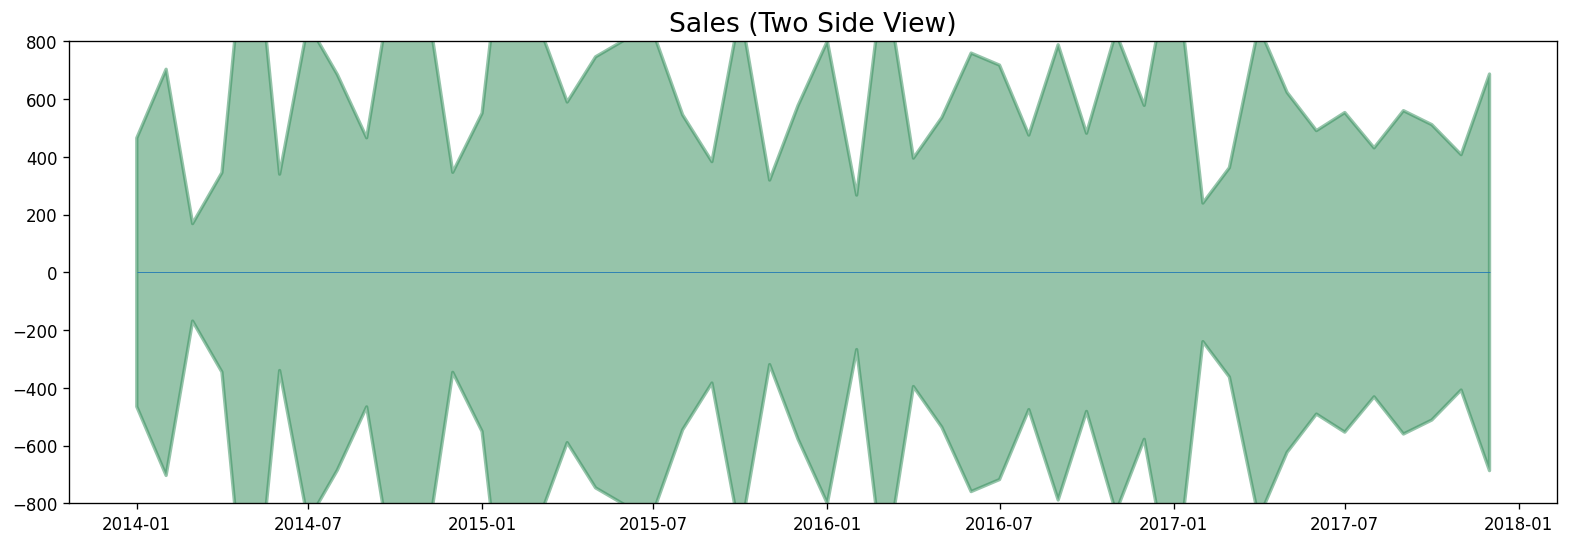

In [14]:
x= monthly_OS.index
y1= monthly_OS['Sales'].values

fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Sales (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(monthly_OS.index), xmax=np.max(monthly_OS.index), linewidth=.5)
plt.show()

In [15]:
OS['year'] = [d.year for d in OS.index]
OS['month'] = [d.strftime('%b') for d in OS.index]
years= OS['year'].unique()
years

array([2016, 2015, 2014, 2017])

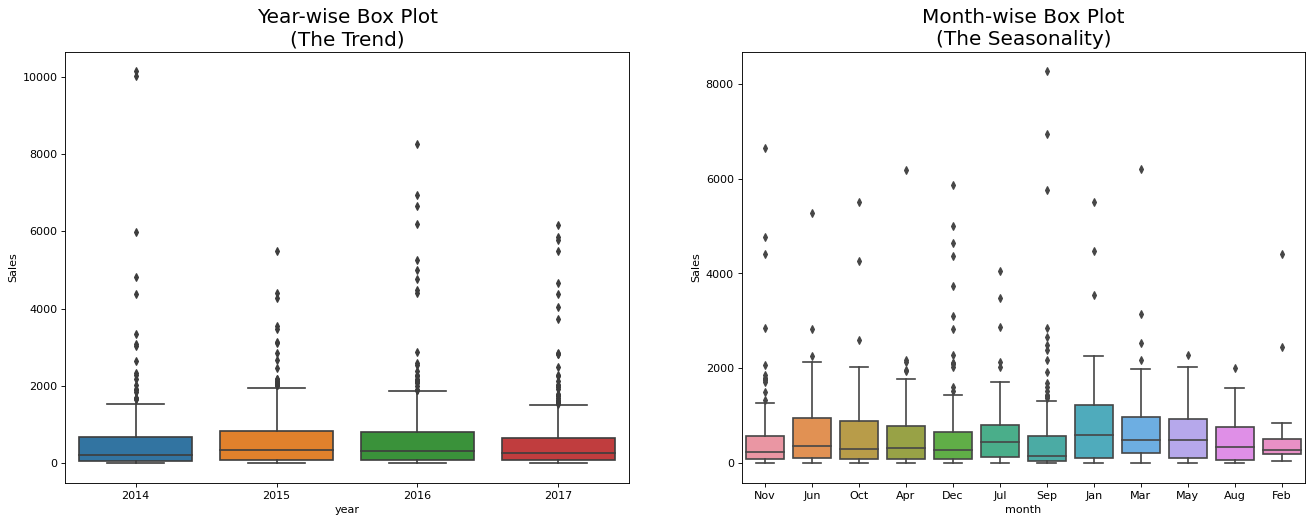

In [16]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Sales', data=OS, ax=axes[0])
sns.boxplot(x='month', y='Sales', data=OS.loc[~OS.year.isin([2014,2917]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

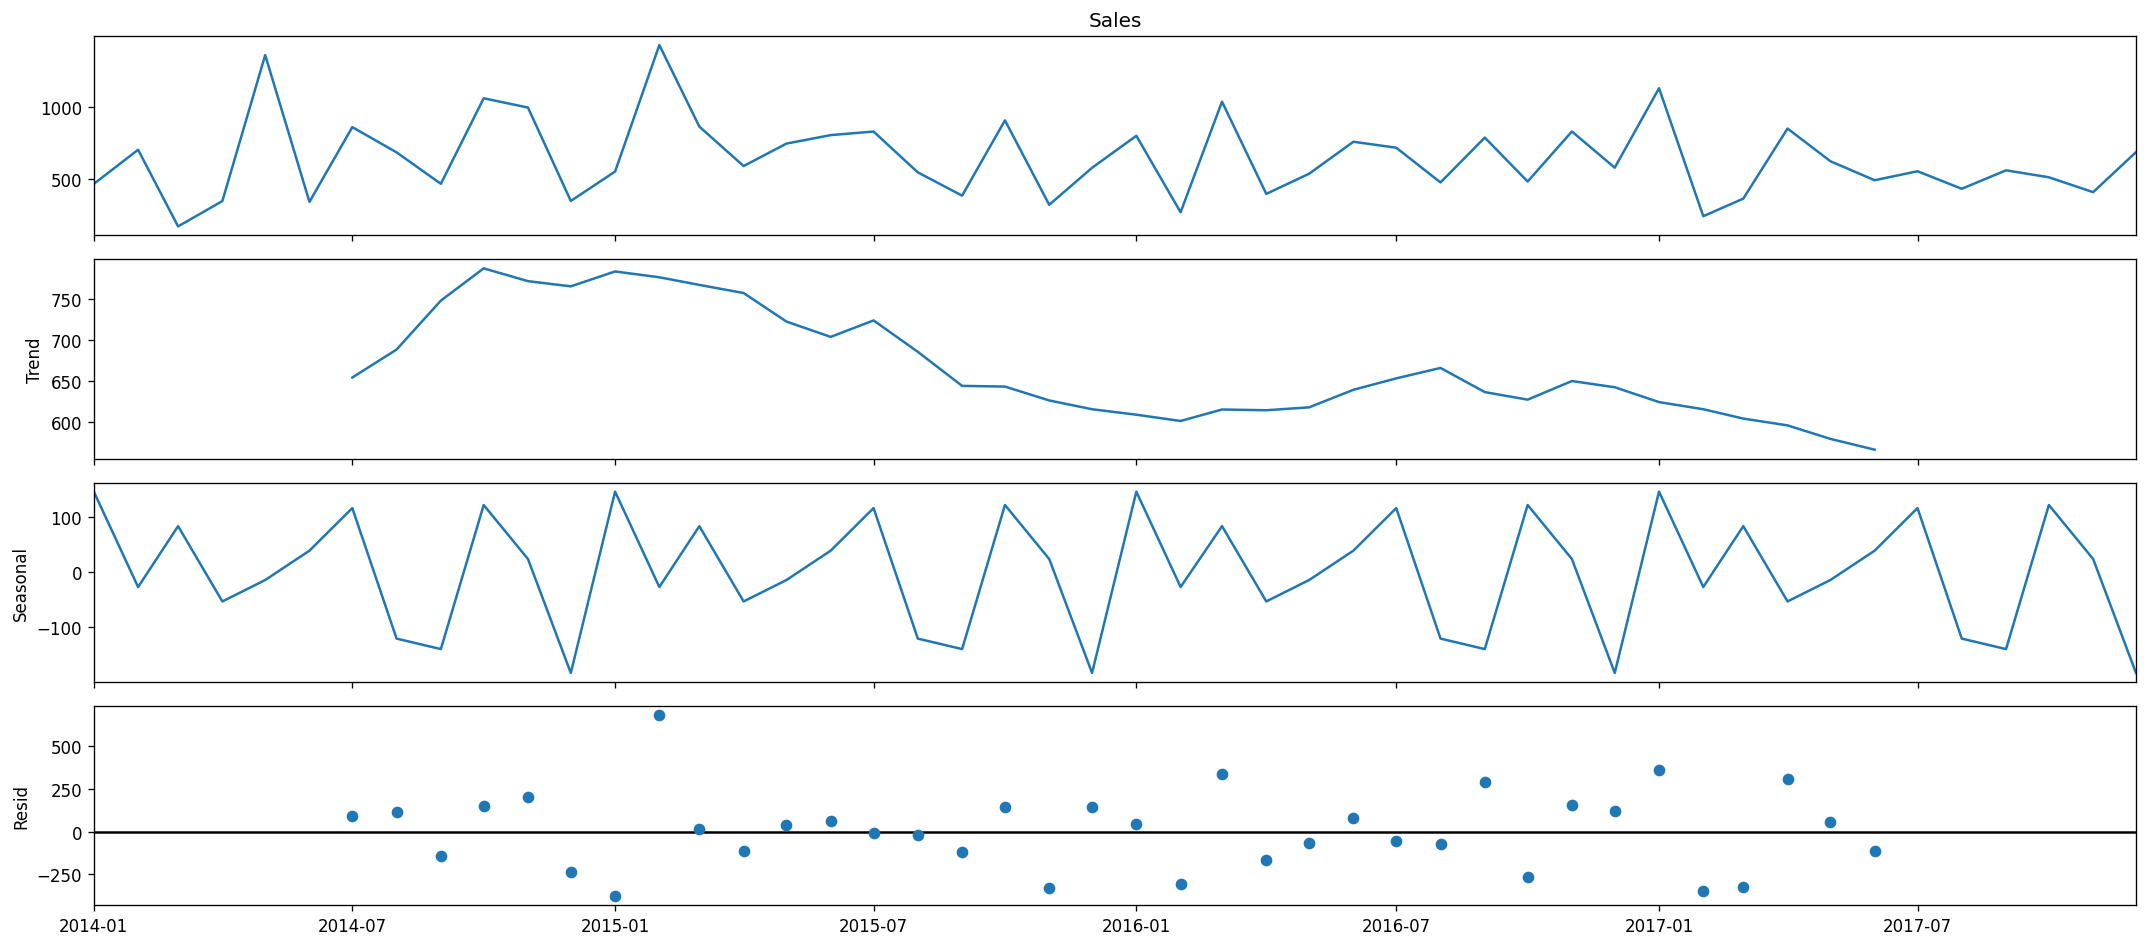

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_OS['Sales'], model='additive')
fig = decomposition.plot()
plt.show()

In [18]:
#Determing rolling statistics
moving_avg = monthly_OS.rolling(12).mean()
moving_std= monthly_OS.rolling(12).std()

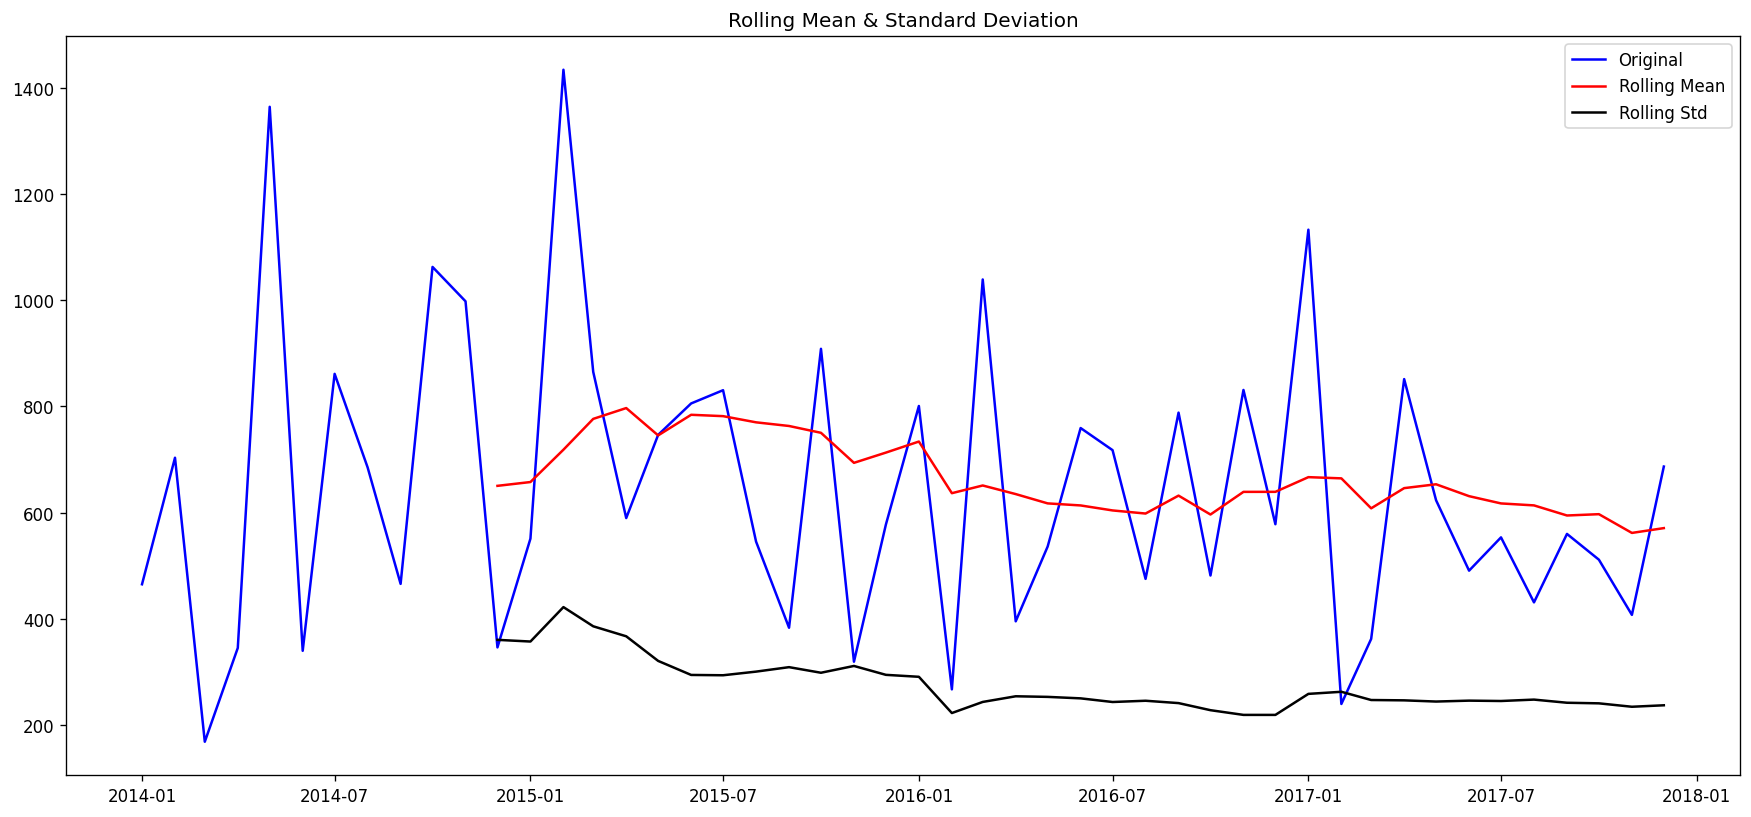

In [19]:
#Plot rolling statistics:
orig = plt.plot(monthly_OS, color='blue',label='Original')
mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
std = plt.plot(moving_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [20]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(monthly_OS, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -1.630238
p-value                         0.467366
#Lags Used                      4.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


In [21]:
do= pd.read_csv('../input/dataset-superstore-20152018/Dataset- Superstore (2015-2018).csv')
store= do.loc[do['Category']=='Office Supplies']
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
store.drop(cols, axis=1, inplace=True)
store

<ipython-input-21-96bb9e19b624>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store.drop(cols, axis=1, inplace=True)


,Order Date,Sales
2,2016/06/12,14.620
4,2015/10/11,22.368
6,2014/06/09,7.280
8,2014/06/09,18.504
9,2014/06/09,114.900
...,...,...
9982,2016/09/22,35.560
9984,2015/05/17,31.500
9985,2015/05/17,55.600
9992,2017/02/26,29.600


In [22]:
store = store.groupby('Order Date')['Sales'].sum().reset_index()
store

,Order Date,Sales
0,2014/01/03,16.448
1,2014/01/04,288.060
2,2014/01/05,19.536
3,2014/01/06,685.340
4,2014/01/07,10.430
...,...,...
1143,2017/12/26,814.594
1144,2017/12/27,13.248
1145,2017/12/28,1091.244
1146,2017/12/29,282.440


In [23]:
store = store.set_index('Order Date')
store.index

Index(['2014/01/03', '2014/01/04', '2014/01/05', '2014/01/06', '2014/01/07',
       '2014/01/09', '2014/01/10', '2014/01/13', '2014/01/16', '2014/01/18',
       ...
       '2017/12/21', '2017/12/22', '2017/12/23', '2017/12/24', '2017/12/25',
       '2017/12/26', '2017/12/27', '2017/12/28', '2017/12/29', '2017/12/30'],
      dtype='object', name='Order Date', length=1148)

In [24]:
#create new DataFrame:
store.index = pd.to_datetime(store.index)

y = store['Sales'].resample('MS').mean()


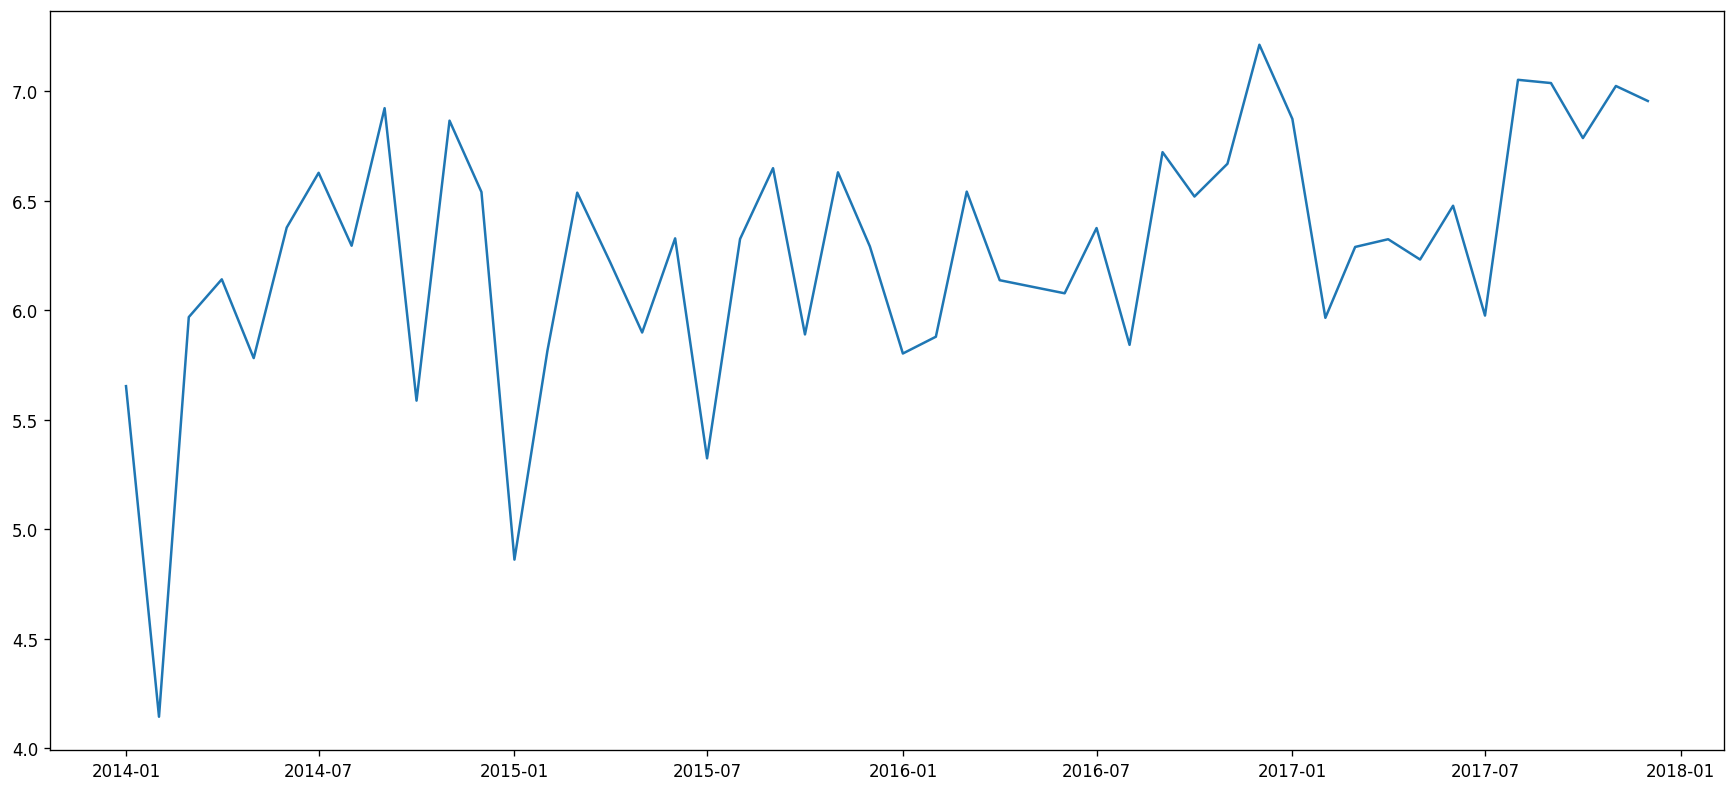

In [25]:
## Lets take a log transform here for simplicity:
ts_log = np.log(y)
plt.plot(ts_log)

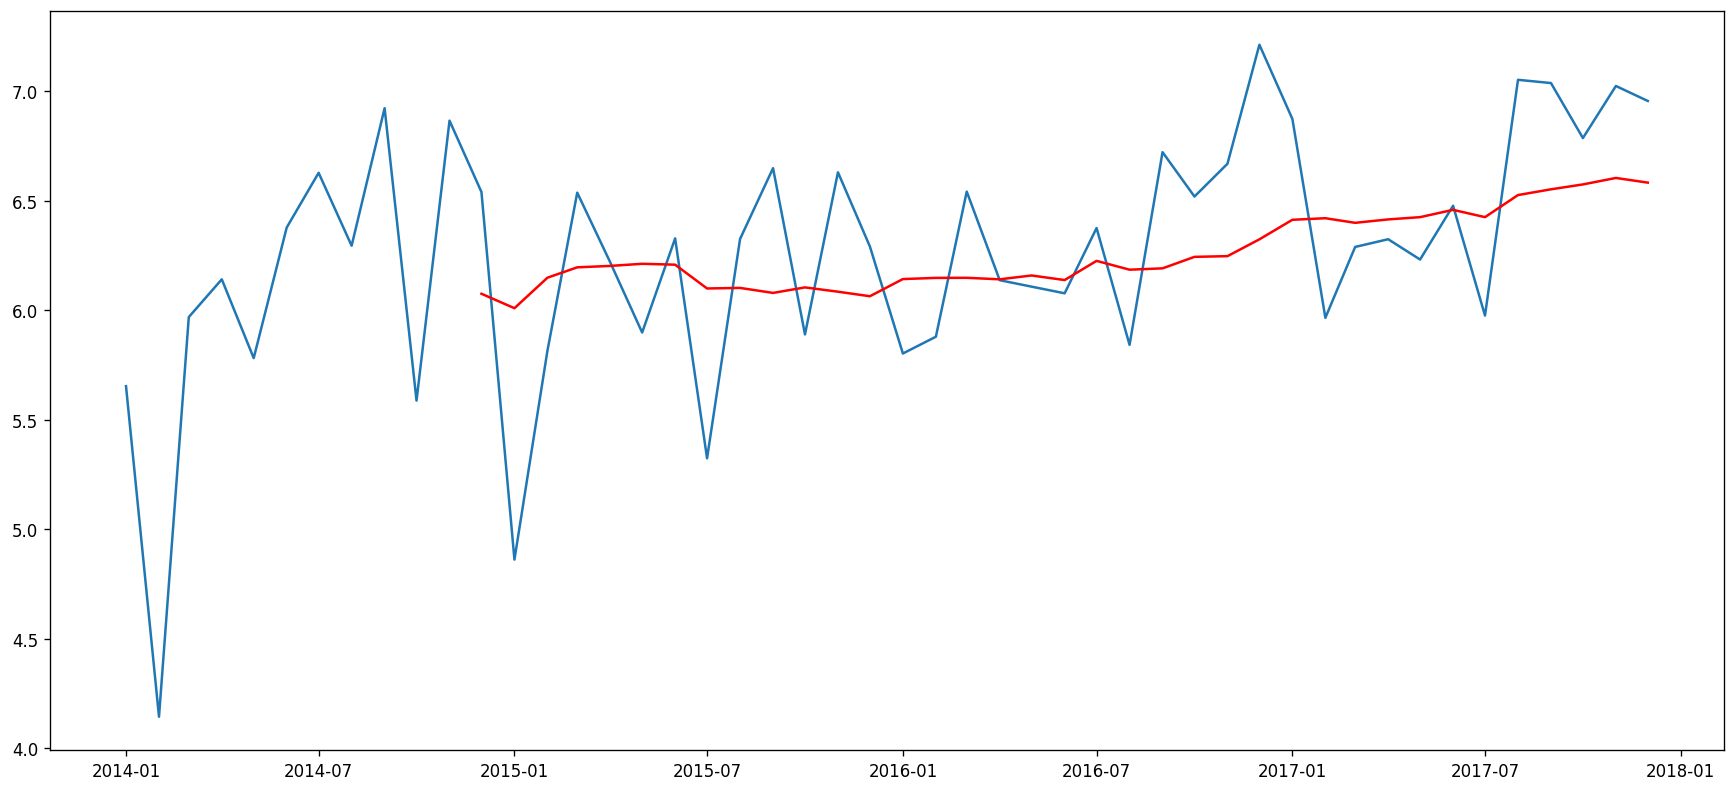

In [26]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [27]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Order Date
2014-01-01         NaN
2014-02-01         NaN
2014-03-01         NaN
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01         NaN
2014-11-01         NaN
2014-12-01    0.464652
Freq: MS, Name: Sales, dtype: float64

In [28]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print ('Results of Dickey-Fuller Test:')
    
    #Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

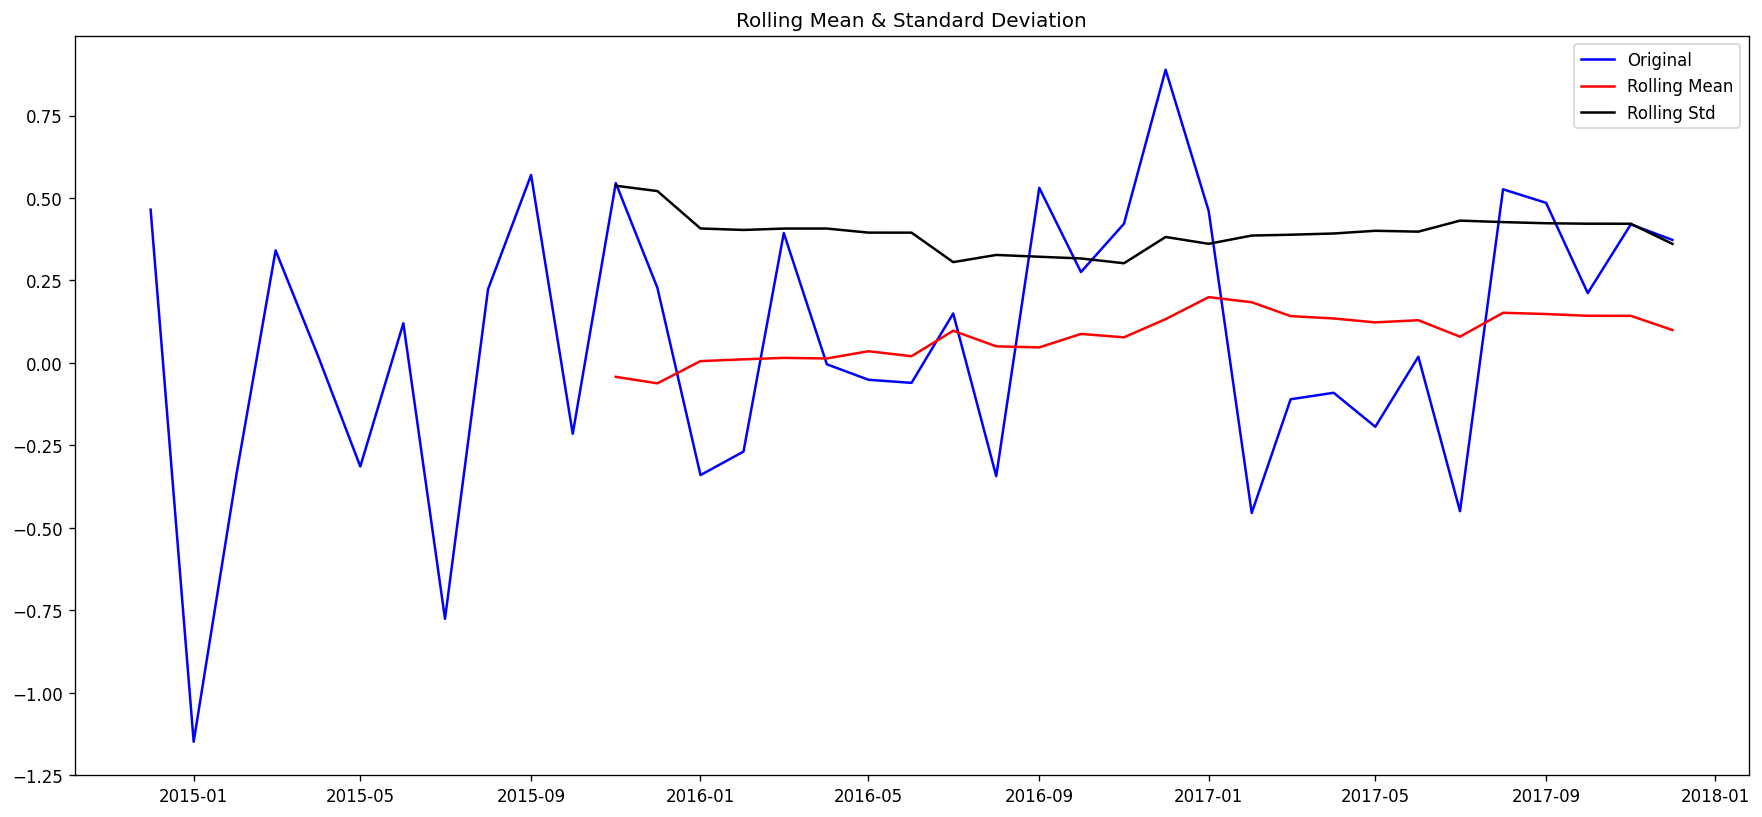

Results of Dickey-Fuller Test:
Test Statistic                 -5.626996
p-value                         0.000001
#Lags Used                      0.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64


In [29]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

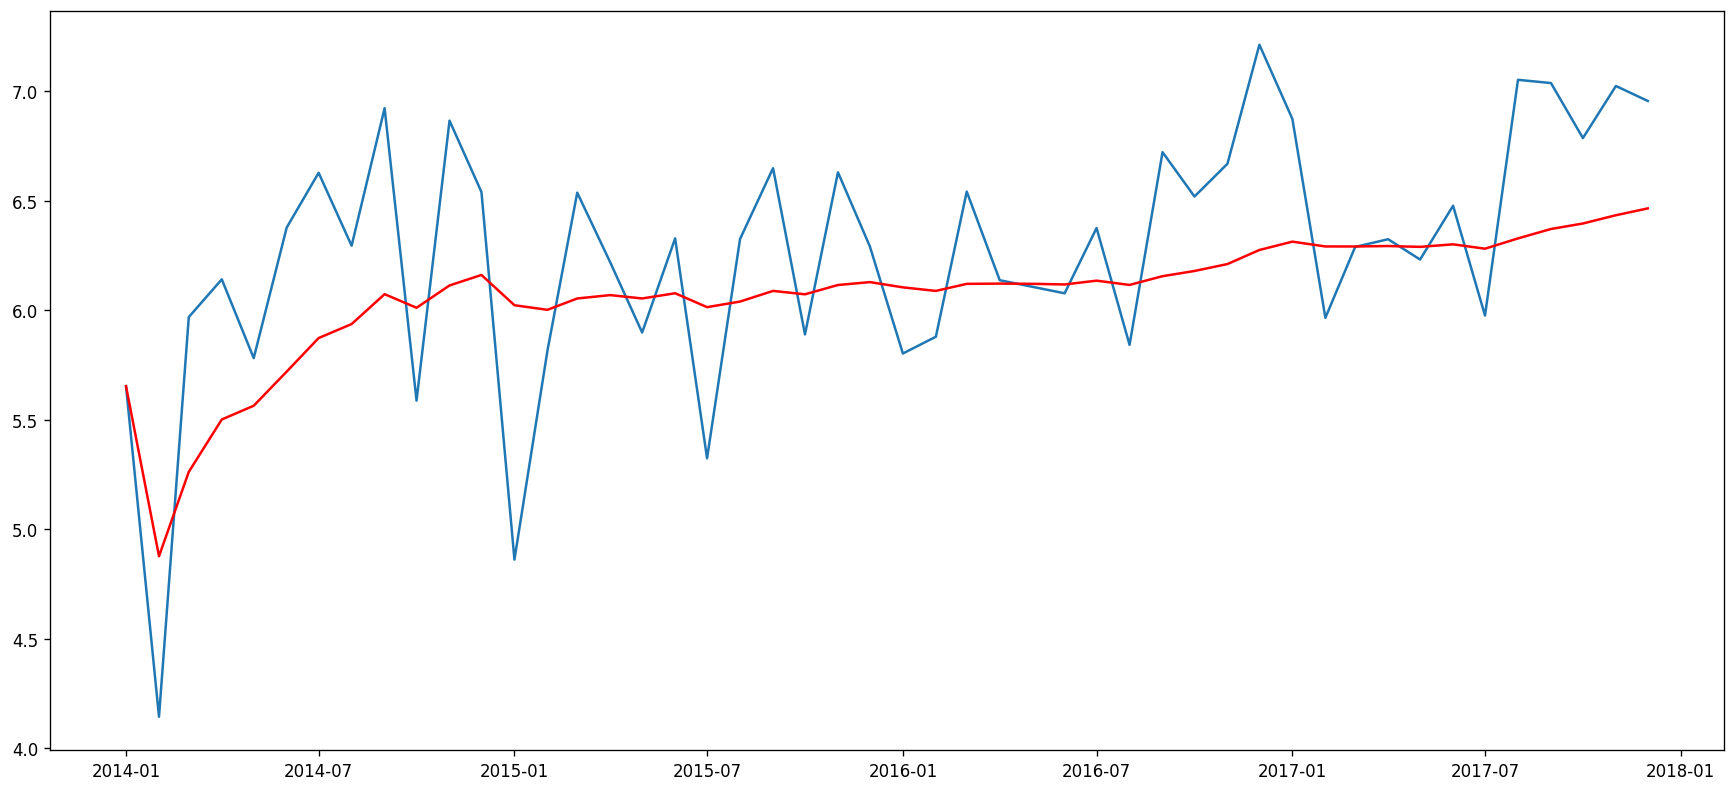

In [30]:
expwighted_avg = ts_log.ewm(halflife=12).mean()

plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

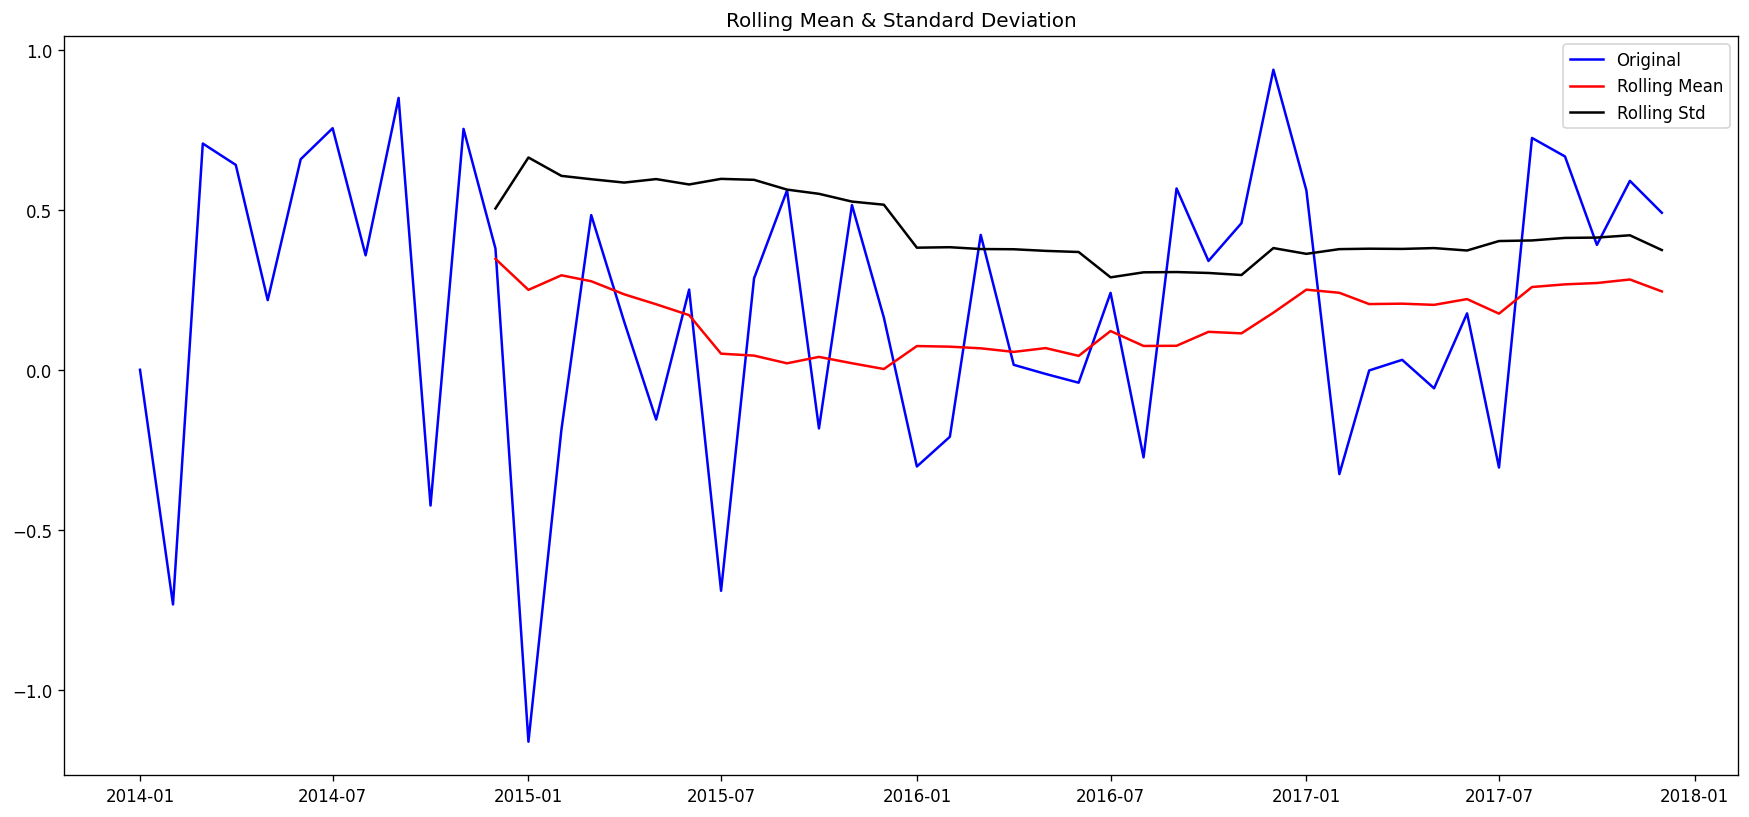

Results of Dickey-Fuller Test:
Test Statistic                 -2.967356
p-value                         0.038057
#Lags Used                      3.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


In [31]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

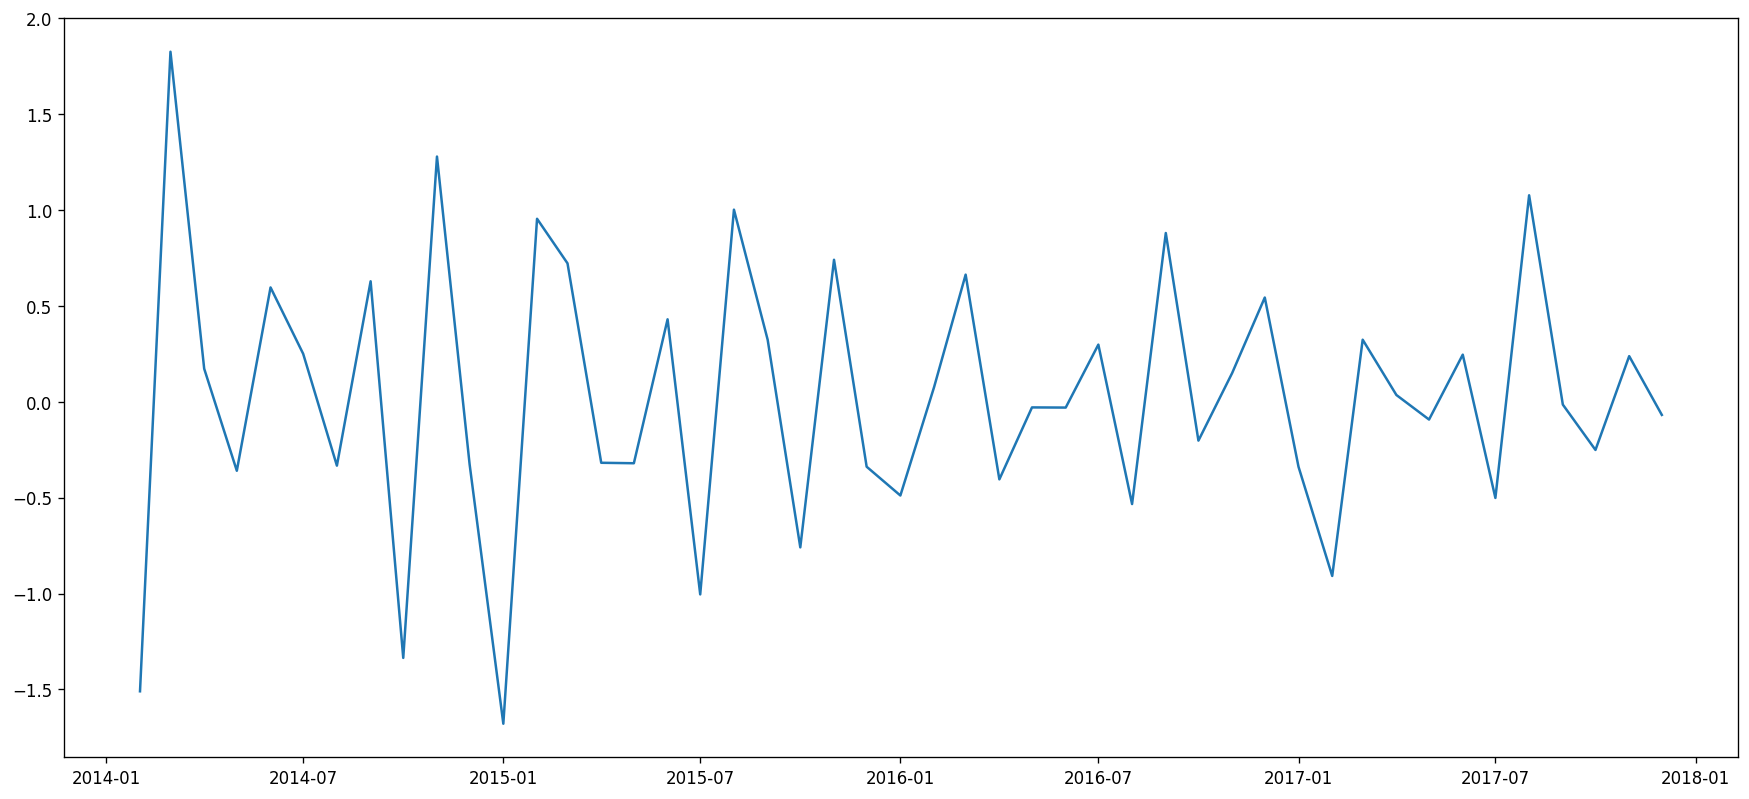

In [32]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

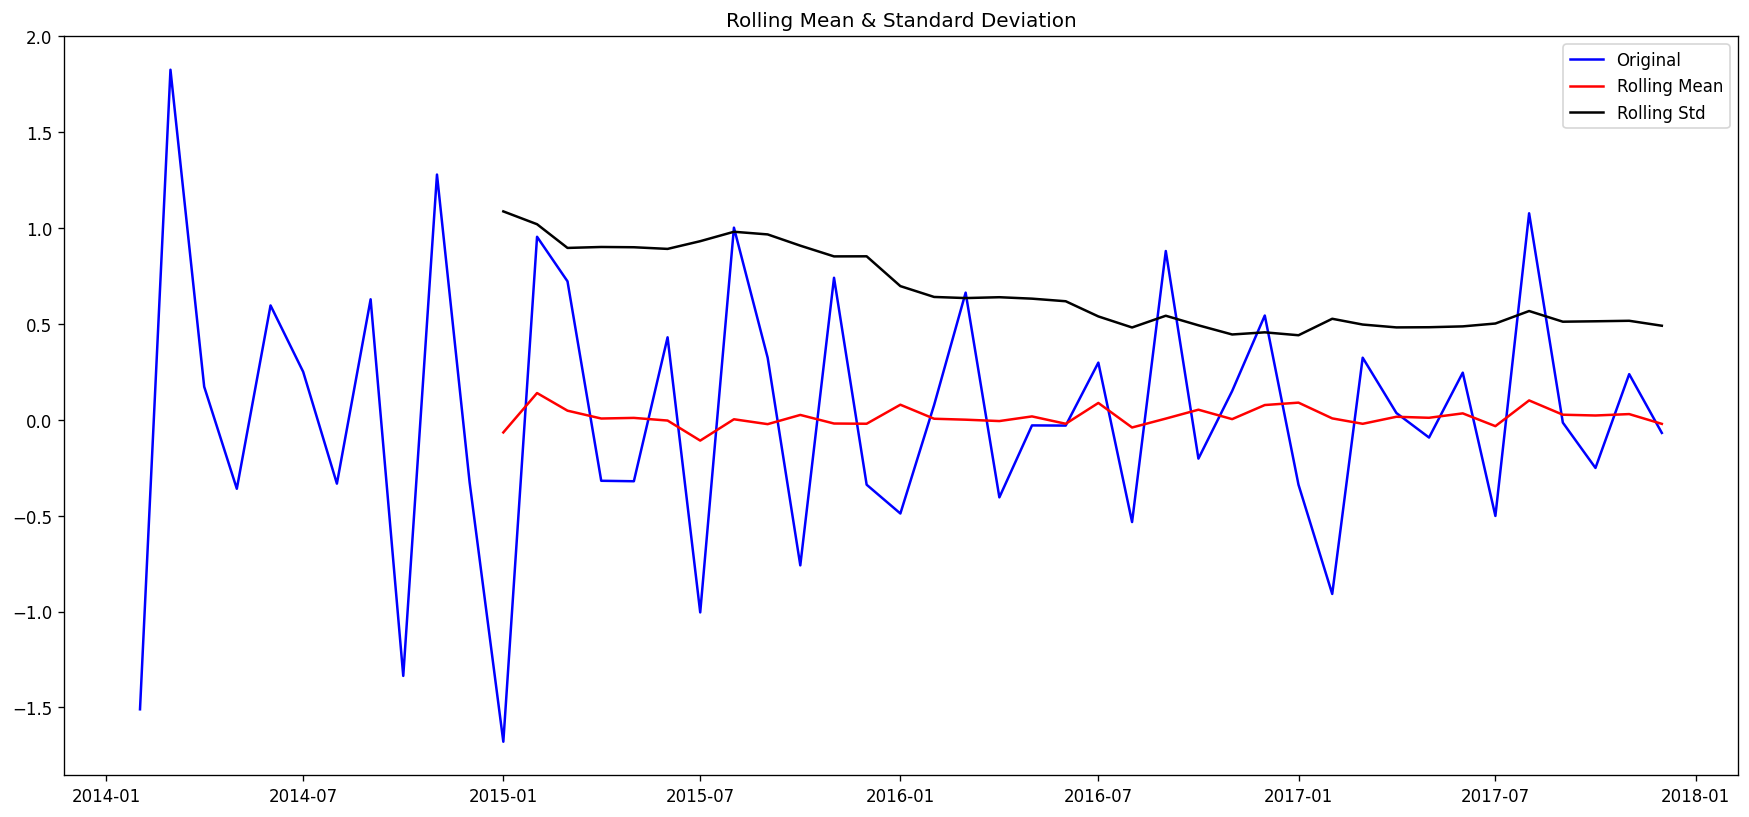

Results of Dickey-Fuller Test:
Test Statistic                 -4.771865
p-value                         0.000062
#Lags Used                      9.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


In [33]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

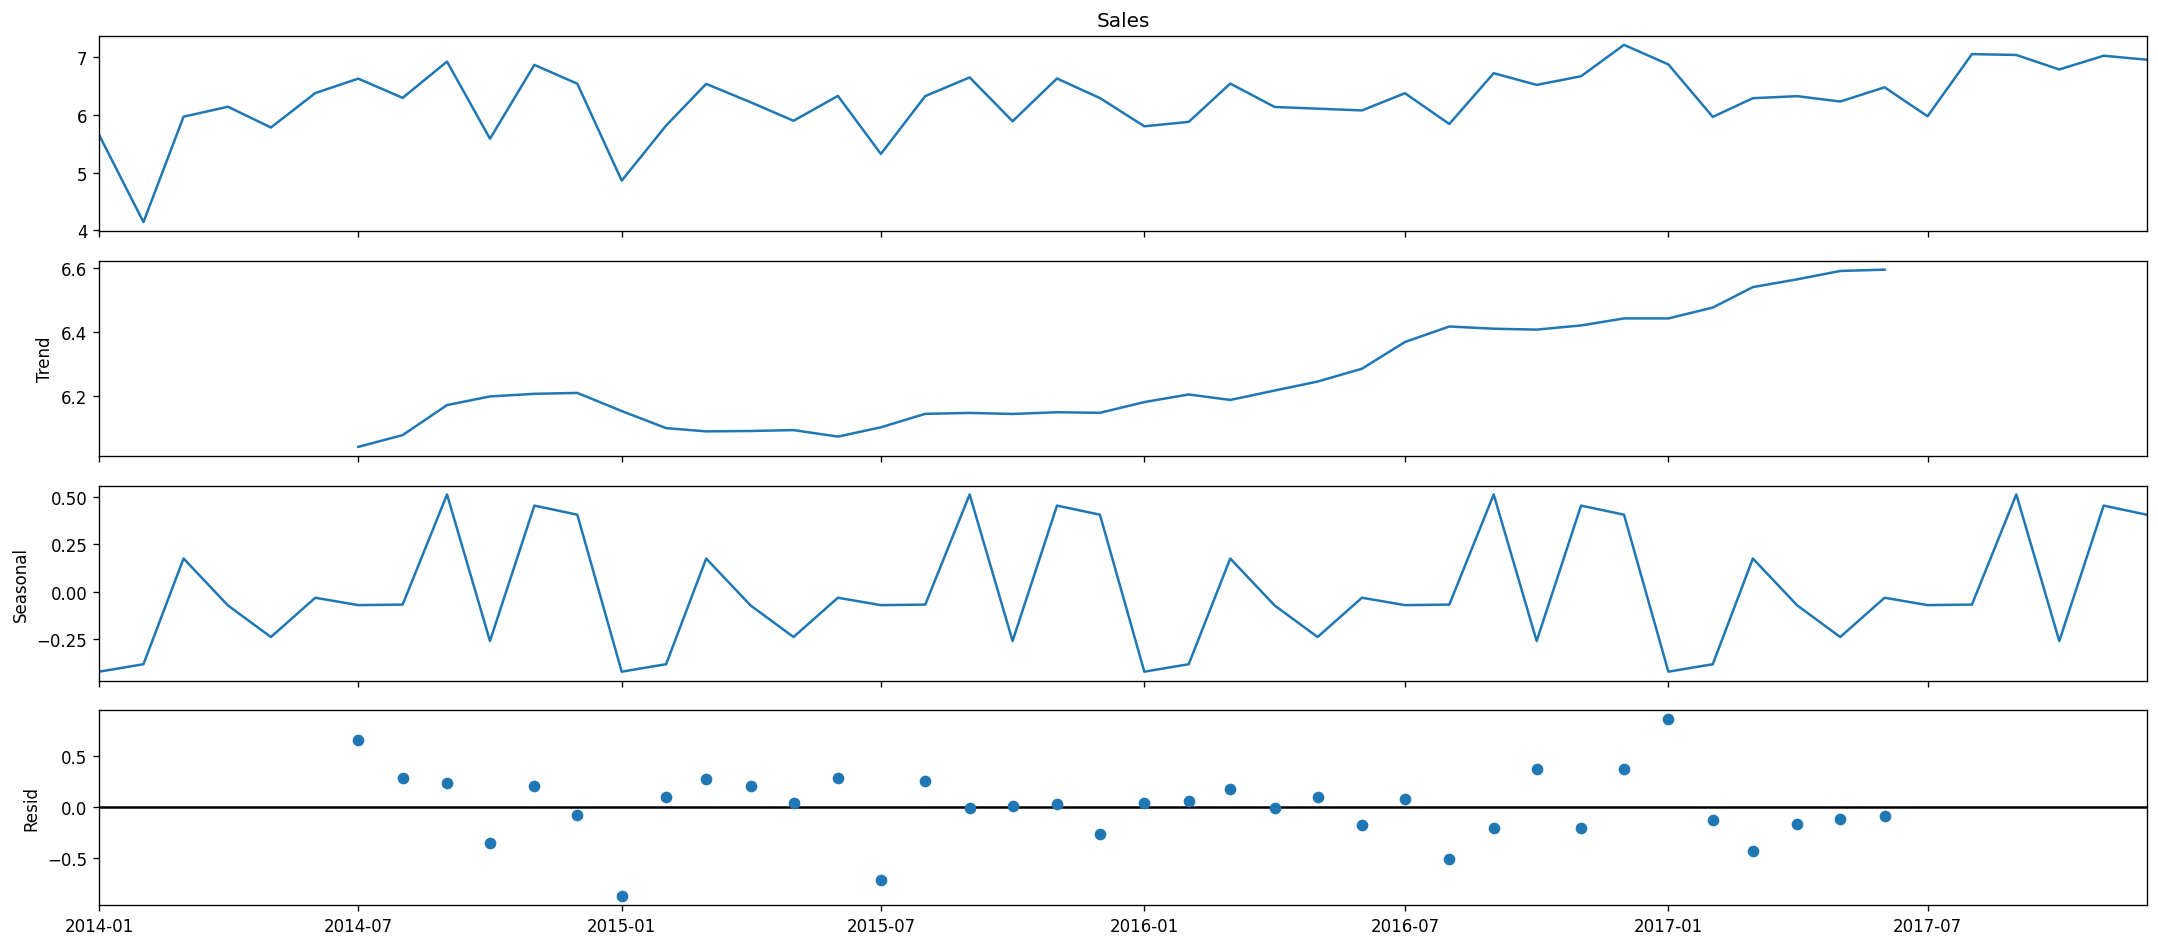

In [34]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(ts_log, model='additive')
fig = decomposition.plot()
plt.show()

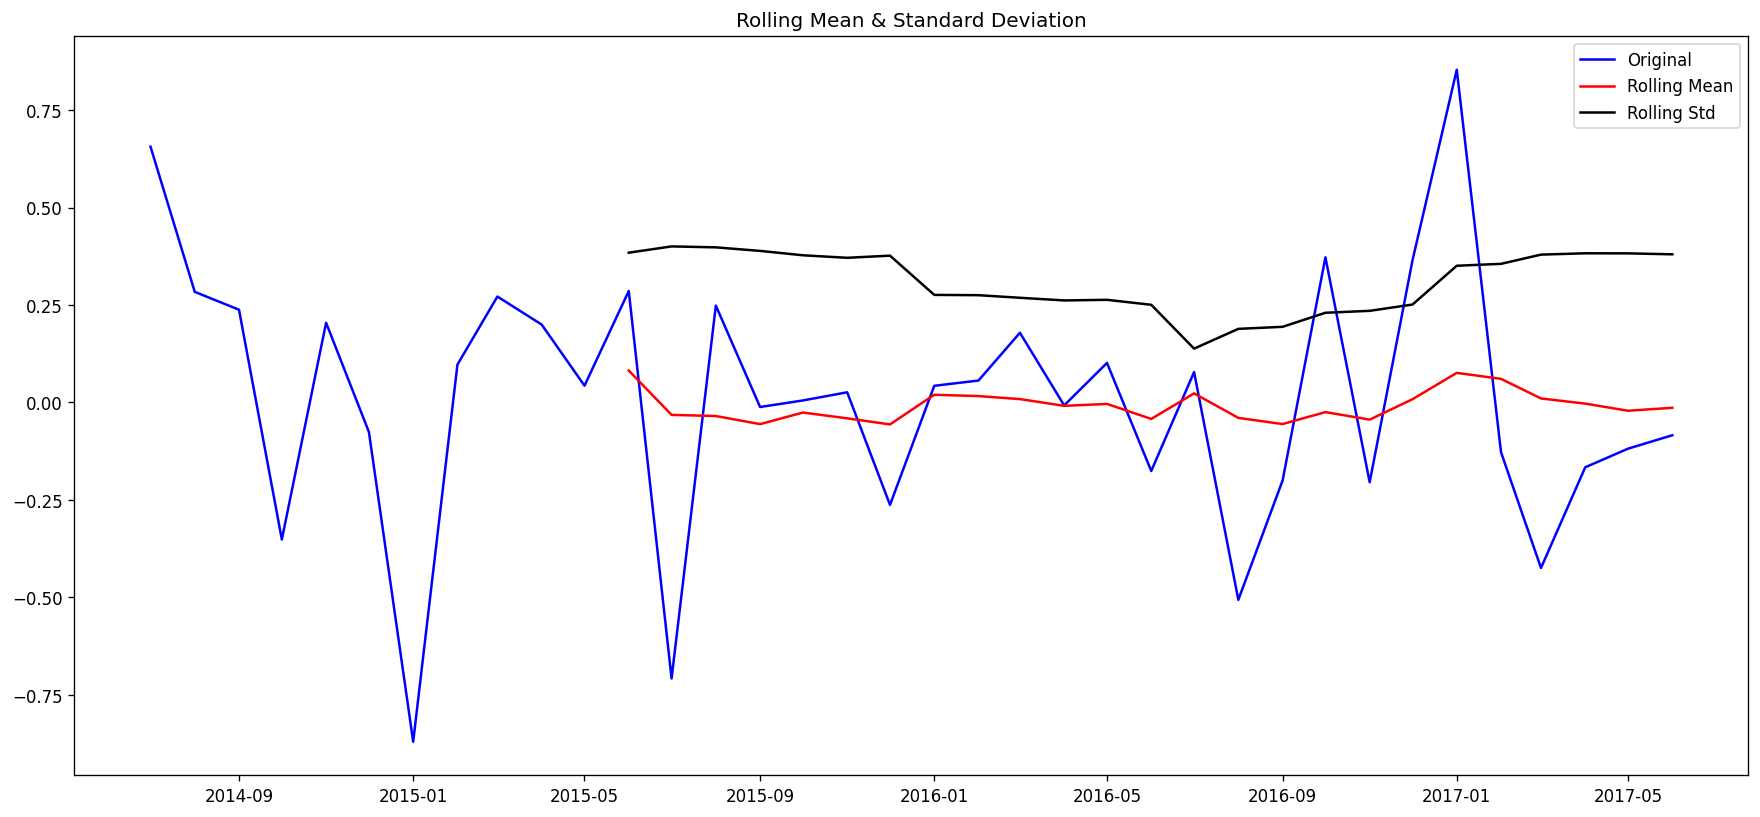

Results of Dickey-Fuller Test:
Test Statistic                 -4.901459
p-value                         0.000035
#Lags Used                      4.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)
residual = decomposition.resid

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)


In [36]:

train= y[:40]
test= y[40:]


In [37]:
!pip install pmdarima
import pmdarima

from pmdarima import auto_arima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.7 MB/s eta 0:00:00


In [38]:
 auto_arima(train, test='adf',seasonal=True, trace=True, error_action='ignore', suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=592.497, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=576.965, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=559.020, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=554.143, Time=0.07 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=555.183, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=555.965, Time=0.10 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 0.982 seconds


ARIMA(order=(3, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [39]:

auto_arima(y,test='adf',       # use adftest to find optimal 'd'
                       # maximum p and q
                                 # frequency of series
                       # let model determine 'd'
                      seasonal=True,   # No Seasonality
                       

                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=668.770, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=682.234, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=673.518, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=680.349, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=668.928, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=670.928, Time=0.14 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=669.659, Time=0.11 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 2.439 second

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [40]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train, order=(1,1,1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   40
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -273.088
Date:                Sat, 01 Feb 2025   AIC                            552.176
Time:                        09:09:48   BIC                            557.167
Sample:                    01-01-2014   HQIC                           553.967
                         - 04-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1424      0.249      0.573      0.567      -0.345       0.630
ma.L1         -0.9118      0.143     -6.398      0.000      -1.191      -0.632
sigma2      6.796e+04   1.48e+04      4.607      0.000     3.9e+04    9.69e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 1.34
Prob(Q):                              0.60   Prob(JB):                         0.51
Heteroskedasticity (H):               0.84   Skew:                             0.45
Prob(H) (two-sided):                  0.76   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
pred= model.predict(start=len(train), end=(len(y)-1),dynamic=True)
pred

2017-05-01    609.236647
2017-06-01    616.500446
2017-07-01    617.534861
2017-08-01    617.682168
2017-09-01    617.703146
2017-10-01    617.706133
2017-11-01    617.706559
2017-12-01    617.706619
Freq: MS, Name: predicted_mean, dtype: float64

In [42]:
test

Order Date
2017-05-01     508.776444
2017-06-01     650.463038
2017-07-01     393.902615
2017-08-01    1156.148154
2017-09-01    1139.137250
2017-10-01     886.045846
2017-11-01    1124.012036
2017-12-01    1049.549724
Freq: MS, Name: Sales, dtype: float64

In [43]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

mape = mean_absolute_percentage_error(test, pred) * 100
rmse = np.sqrt(mean_squared_error(test, pred))
mae = mean_absolute_error(test, pred)

print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

MAPE: 36.32%
RMSE: 377.15
MAE: 328.06


<Axes: xlabel='Order Date'>

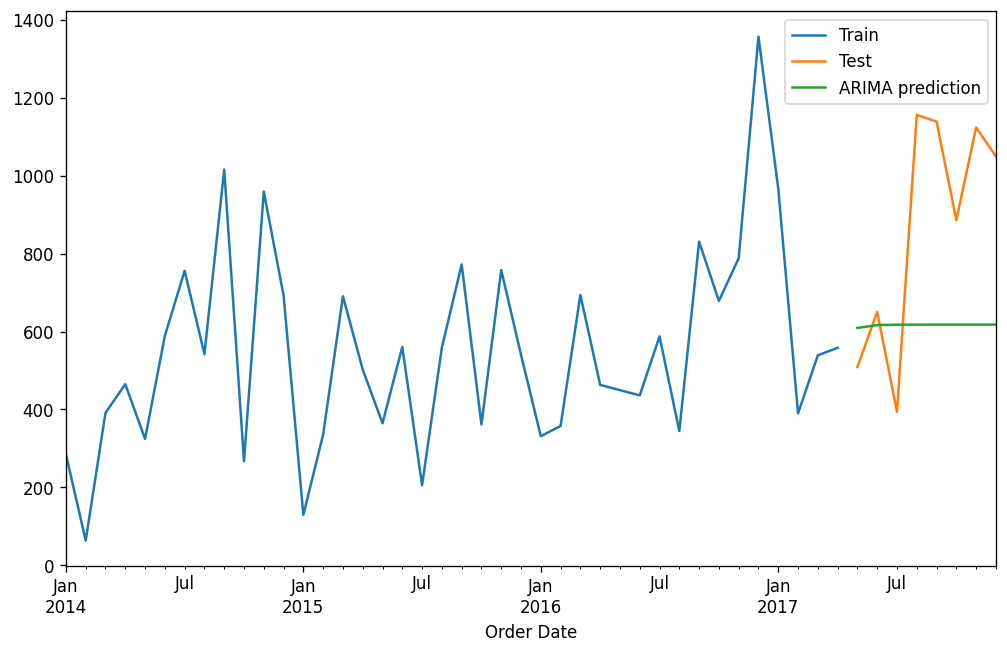

In [44]:
train.plot(legend=True, label='Train', figsize=(10,6))

test.plot(legend=True, label= 'Test')

pred.plot(legend=True, label='ARIMA prediction')

In [45]:
import statsmodels.api as sm
model1=sm.tsa.statespace.SARIMAX(train,order=(1, 1, 1),seasonal_order=(1,1,1,12))

results=model1.fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   40
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -189.243
Date:                            Sat, 01 Feb 2025   AIC                            388.486
Time:                                    09:09:51   BIC                            394.965
Sample:                                01-01-2014   HQIC                           390.413
                                     - 04-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2075      0.300      0.693      0.489      -0.380       0.795
ma.L1         -0.9253      0.326     -2.838      0.005      -1.564      -0.286
ar.S.L12       0.2316      0.758      0.305      0.760      -1.255       1.718
ma.S.L12      -0.9971      0.465     -2.143      0.032      -1.909      -0.085
sigma2      4.794e+04   9.81e-06   4.89e+09      0.000    4.79e+04    4.79e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.39
Prob(Q):                              0.98   Prob(JB):                         0.18
Heteroskedasticity (H):               2.18   Skew:                             0.63
Prob(H) (two-sided):                  0.26   Kurtosis:                         4.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.69e+25. Standard errors may be unstable.
"""

In [46]:
pre=results.predict(start= len(train), end= (len(y)-1),dynamic=True)
pre

2017-05-01     524.235024
2017-06-01     636.978085
2017-07-01     686.334910
2017-08-01     583.602892
2017-09-01     997.203984
2017-10-01     638.849415
2017-11-01     957.401880
2017-12-01    1119.286211
Freq: MS, Name: predicted_mean, dtype: float64

In [47]:
test

Order Date
2017-05-01     508.776444
2017-06-01     650.463038
2017-07-01     393.902615
2017-08-01    1156.148154
2017-09-01    1139.137250
2017-10-01     886.045846
2017-11-01    1124.012036
2017-12-01    1049.549724
Freq: MS, Name: Sales, dtype: float64

<Axes: xlabel='Order Date'>

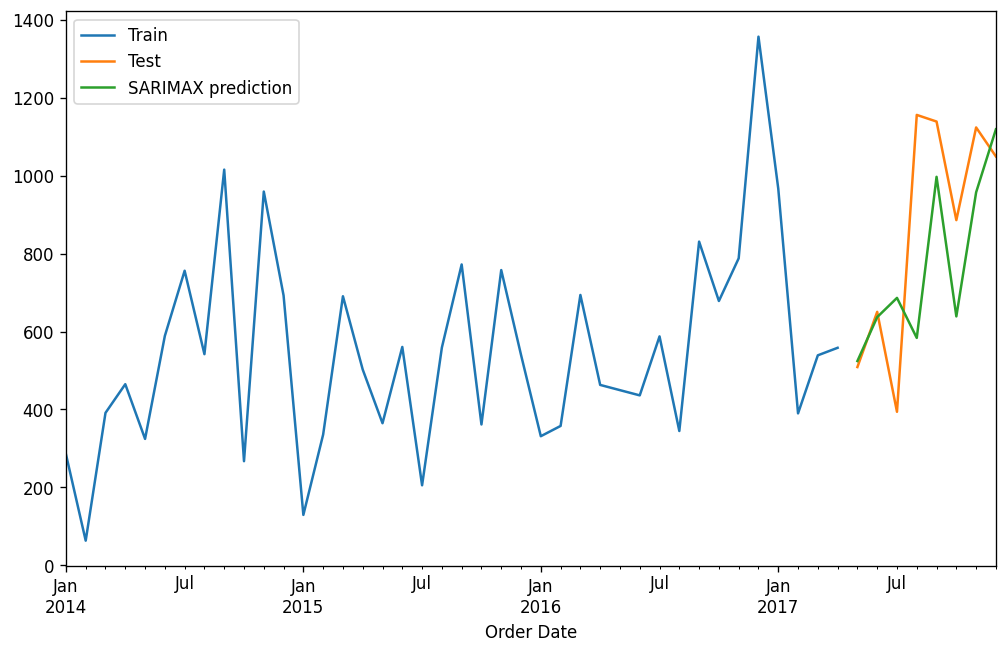

In [48]:
train.plot(legend=True, label='Train', figsize=(10,6))

test.plot(legend=True, label= 'Test')

pre.plot(legend=True, label='SARIMAX prediction')

In [49]:
mape = mean_absolute_percentage_error(test, pre) * 100
rmse = np.sqrt(mean_squared_error(test, pre))
mae = mean_absolute_error(test, pre)

print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

MAPE: 23.84%
RMSE: 256.81
MAE: 189.92


In [50]:
future_sale= results.predict(start= len(y), end=(len(y)+12))
future_sale

2018-01-01     733.827769
2018-02-01     467.389318
2018-03-01     714.995712
2018-04-01     671.121361
2018-05-01     602.588616
2018-06-01     738.377708
2018-07-01     762.813586
2018-08-01     692.278265
2018-09-01    1088.996825
2018-10-01     682.930715
2018-11-01    1049.892852
2018-12-01    1117.449142
2019-01-01     733.052559
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='Order Date'>

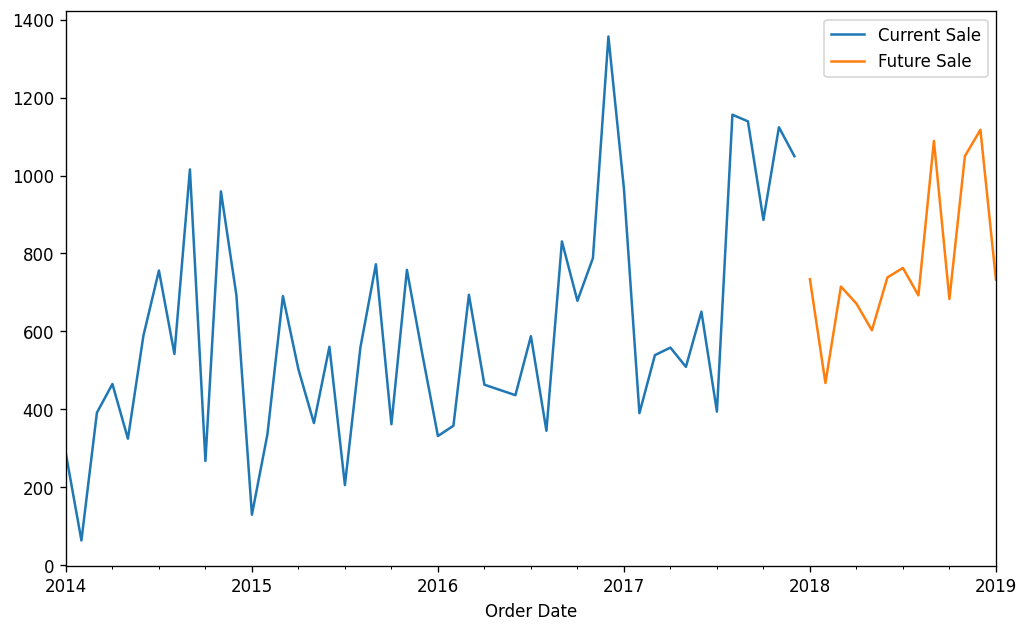

In [51]:
y.plot(legend=True, label='Current Sale', figsize=(10,6))

future_sale.plot(legend= True, label='Future Sale')


***USing Prophet***

In [52]:
!pip install prophet

In [53]:
from prophet import Prophet

In [54]:
import pandas as pd

# Data in a dictionary format
data = {
    'Order Date': [
        '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01',
        '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
        '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
        '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
        '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
        '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
        '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
        '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
        '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
        '2017-10-01', '2017-11-01', '2017-12-01'
    ],
    'Sales': [
        285.357647, 63.042588, 391.176318, 464.794750, 324.346545,
        588.774409, 756.060400, 541.879143, 1015.677704, 267.078815,
        959.372714, 692.556231, 129.198571, 335.504188, 690.545522,
        502.342320, 364.549440, 560.407737, 205.214739, 558.814667,
        772.230680, 361.392083, 757.790357, 540.055800, 331.230125,
        357.597368, 693.877240, 462.932478, 449.489724, 436.072400,
        587.474727, 344.605385, 830.847786, 678.408083, 787.972231,
        1357.055929, 967.013136, 389.882737, 538.899481, 558.229296,
        508.776444, 650.463038, 393.902615, 1156.148154, 1139.137250,
        886.045846, 1124.012036, 1049.549724
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Rename columns to 'ds' and 'y'
df.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)

# Convert 'ds' to datetime
df['ds'] = pd.to_datetime(df['ds'])

# Determine the split point (80% train, 20% test)
split_point = int(len(df) * 0.8)

# Split the DataFrame
train_df = df[:split_point]
test_df = df[split_point:]

# Display the train and test DataFrames
print("Training DataFrame:")
print(train_df)
print("\nTesting DataFrame:")
print(test_df)

# Optionally, you can also check the shapes of the train and test DataFrames
print("\nShape of Training DataFrame:", train_df.shape)
print("Shape of Testing DataFrame:", test_df.shape)

Training DataFrame:
           ds            y
0  2014-01-01   285.357647
1  2014-02-01    63.042588
2  2014-03-01   391.176318
3  2014-04-01   464.794750
4  2014-05-01   324.346545
5  2014-06-01   588.774409
6  2014-07-01   756.060400
7  2014-08-01   541.879143
8  2014-09-01  1015.677704
9  2014-10-01   267.078815
10 2014-11-01   959.372714
11 2014-12-01   692.556231
12 2015-01-01   129.198571
13 2015-02-01   335.504188
14 2015-03-01   690.545522
15 2015-04-01   502.342320
16 2015-05-01   364.549440
17 2015-06-01   560.407737
18 2015-07-01   205.214739
19 2015-08-01   558.814667
20 2015-09-01   772.230680
21 2015-10-01   361.392083
22 2015-11-01   757.790357
23 2015-12-01   540.055800
24 2016-01-01   331.230125
25 2016-02-01   357.597368
26 2016-03-01   693.877240
27 2016-04-01   462.932478
28 2016-05-01   449.489724
29 2016-06-01   436.072400
30 2016-07-01   587.474727
31 2016-08-01   344.605385
32 2016-09-01   830.847786
33 2016-10-01   678.408083
34 2016-11-01   787.972231
35 2016-

09:09:58 - cmdstanpy - INFO - Chain [1] start processing
09:09:58 - cmdstanpy - INFO - Chain [1] done processing


MAPE: 23.76%
RMSE: 227.16
MAE: 175.59


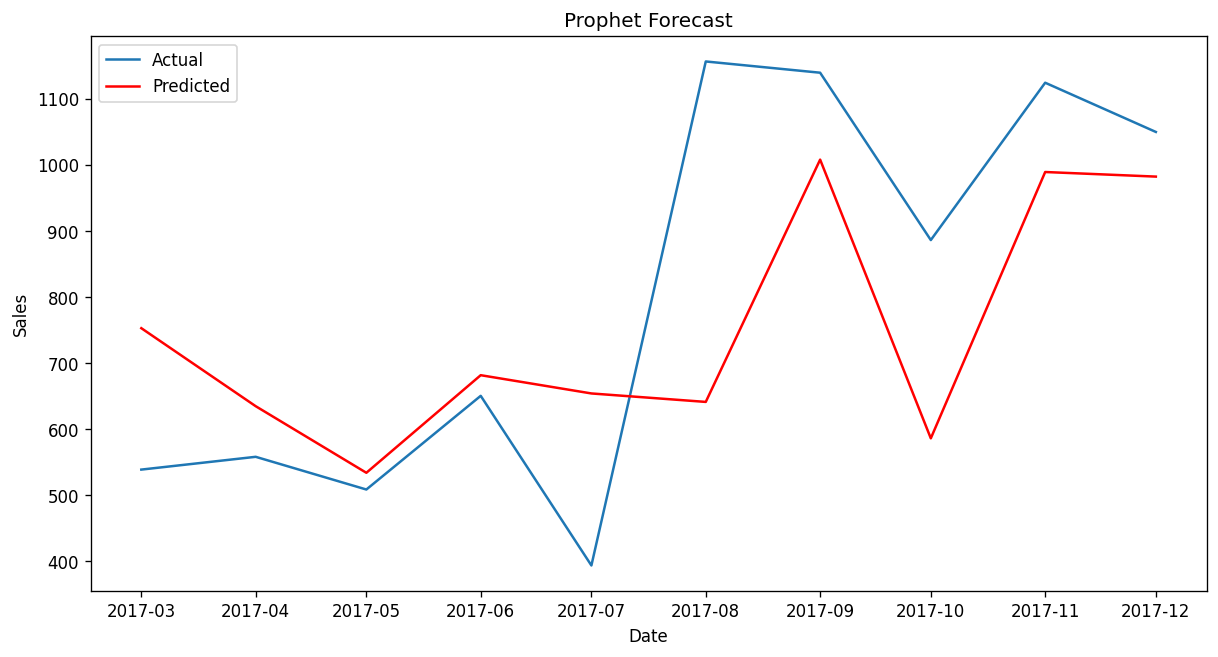

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

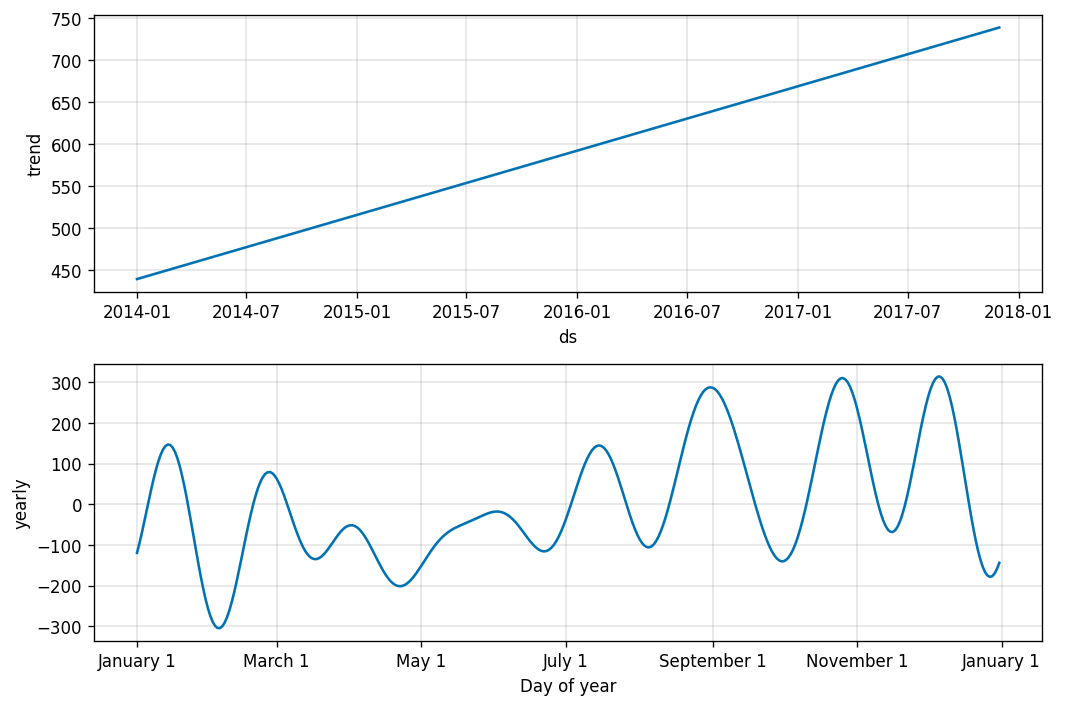

  0%|          | 0/3 [00:00<?, ?it/s]

09:09:59 - cmdstanpy - INFO - Chain [1] start processing
09:09:59 - cmdstanpy - INFO - Chain [1] done processing
09:09:59 - cmdstanpy - INFO - Chain [1] start processing
09:09:59 - cmdstanpy - INFO - Chain [1] done processing
09:09:59 - cmdstanpy - INFO - Chain [1] start processing
09:09:59 - cmdstanpy - INFO - Chain [1] done processing


  horizon           mse        rmse         mae      mape     mdape     smape  \
0 28 days  35636.066226  188.775174  186.164874  0.259651  0.243459  0.280041   
1 53 days  19342.875815  139.078668  122.632396  0.173602  0.211798  0.172464   
2 56 days  10052.700225  100.263155   88.784794  0.172200  0.211798  0.190705   
3 59 days   3257.328634   57.073011   51.400571  0.126665  0.075193  0.135900   
4 83 days   3212.228155   56.676522   50.692937  0.132983  0.084503  0.141769   

   coverage  
0  0.000000  
1  0.333333  
2  0.666667  
3  1.000000  
4  1.000000  


In [55]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Convert data to DataFrame
df = pd.DataFrame(data)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Split data into train and test sets
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

# Initialize and fit Prophet model with advanced configurations
model = Prophet(
    seasonality_mode='additive',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.01,  # Flexibility of trend
    seasonality_prior_scale=0.1     # Strength of seasonal components
)

# Add additional regressors if needed
# model.add_regressor('additional_feature')

# Fit the model
model.fit(train_df)

# Create future dataframe for predictions
future = model.make_future_dataframe(periods=len(test_df), freq='M')
forecast = model.predict(future)

# Extract predictions for test set
predictions = forecast.iloc[-len(test_df):]['yhat'].values
actual = test_df['y'].values

# Calculate performance metrics
mape = mean_absolute_percentage_error(actual, predictions) * 100
rmse = np.sqrt(mean_squared_error(actual, predictions))
mae = mean_absolute_error(actual, predictions)

print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(test_df['ds'], actual, label='Actual')
plt.plot(test_df['ds'], predictions, label='Predicted', color='red')
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Model components visualization
fig = model.plot_components(forecast)
plt.show()

# Diagnostic plots
from prophet.diagnostics import performance_metrics, cross_validation

# Cross-validation
df_cv = cross_validation(model, initial='365 days', period='180 days', horizon = '365 days')
df_p = performance_metrics(df_cv)
print(df_p.head())

In [56]:
# Step 3: Make future predictions
# Create a DataFrame to hold future dates for predictions
future = model.make_future_dataframe(periods=len(test_df), freq='M')  # 'M' for monthly frequency
forecast = model.predict(future)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


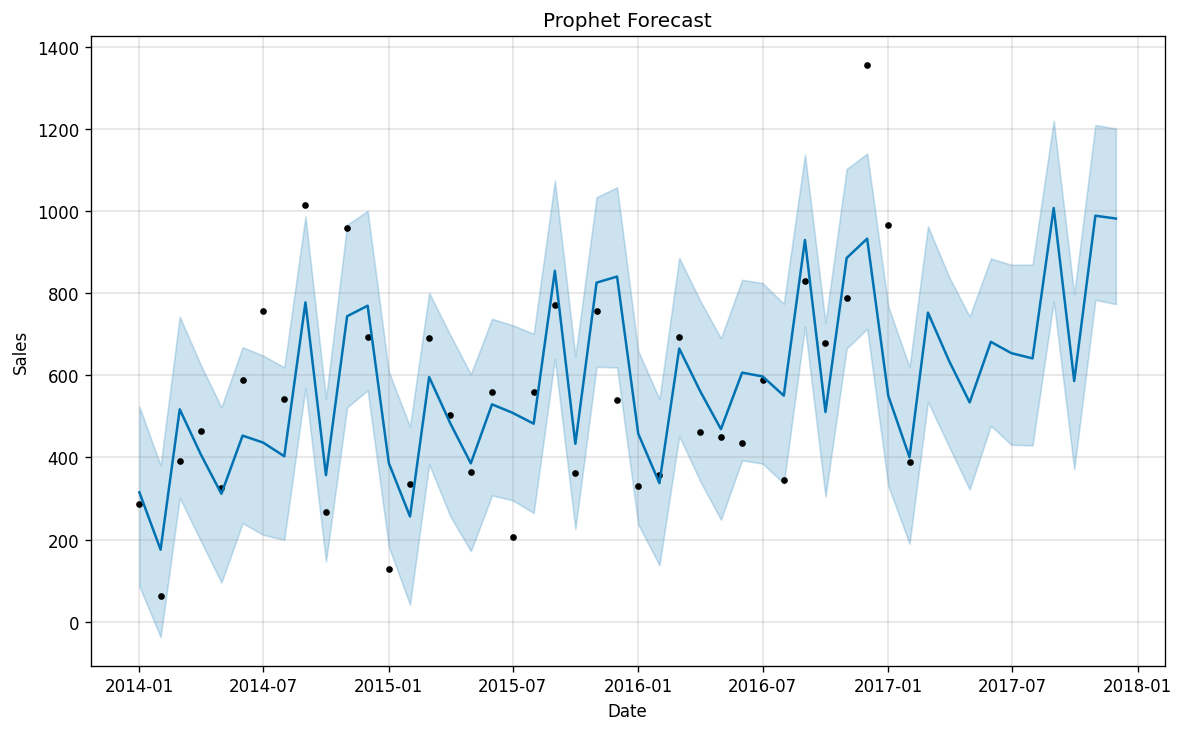

In [57]:
# Step 4: Plot the results
fig = model.plot(forecast)
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()